# Assignment 3: Integrating AI

## Example of using python ML inside Tableau

This whole notebook is just testing and setting up some data, the real magic is in the bottom of this notebook

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [186]:
# Load both csv's
review_df = pd.read_csv("metacritic_critic_reviews.csv")

In [187]:
review_df

,name,review,game,platform,score,date
0,LEVEL (Czech Republic),"Portal 2 is a masterpiece, a work of art that ...",Portal 2,PC,100.0,"May 25, 2011"
1,GameCritics,So do we need Portal 2? Do I need it? Maybe no...,Portal 2,PC,100.0,"May 8, 2011"
2,PC Games (Russia),Portal 2 exceeds every expectation. It has a s...,Portal 2,PC,100.0,"May 6, 2011"
3,Adventure Gamers,"Like its predecessor, Portal 2 is not an adven...",Portal 2,PC,100.0,"Apr 29, 2011"
4,Armchair Empire,"Pile on the ""Oh, yes!"" moments of solving some...",Portal 2,PC,100.0,"Apr 28, 2011"
...,...,...,...,...,...,...
125871,PC PowerPlay,"Well, pardner, I'd suggest you ride far, far a...",Wild West Online,PC,30.0,"May 22, 2018"
125872,GameGrin,The contentless husk of an MMO with uninterest...,Wild West Online,PC,30.0,"May 17, 2018"
125873,GameSpace,Overall Wild West Online in its current state ...,Wild West Online,PC,20.0,"Jun 11, 2018"
125874,Multiplayer.it,Wild West Online is a complete mess. Don't buy...,Wild West Online,PC,20.0,"Jun 1, 2018"


In [188]:
# list all features
list(review_df)

['name', 'review', 'game', 'platform', 'score', 'date']

In [189]:
# Display Review count for each reviewer
print("Review count for each reviewer:")
for key, count in review_df.name.value_counts().iteritems():
    print(f"* {key}: {count}")
    
# Display total reviews amount
print(f"Total reviews Amount: {review_df.shape[0]}")

Review count for each reviewer:
* Multiplayer.it: 2345
* Everyeye.it: 2203
* IGN: 2150
* Vandal: 2132
* GameSpot: 2056
* Destructoid: 1844
* Eurogamer Italy: 1789
* 4Players.de: 1772
* SpazioGames: 1748
* COGconnected: 1666
* Hardcore Gamer: 1666
* God is a Geek: 1633
* 3DJuegos: 1589
* CD-Action: 1564
* Gameblog.fr: 1491
* Game Informer: 1407
* DarkStation: 1389
* ZTGD: 1379
* IGN Italia: 1376
* XGN: 1350
* Meristation: 1339
* Metro GameCentral: 1316
* GamingTrend: 1309
* Digitally Downloaded: 1276
* Push Square: 1274
* IGN Spain: 1174
* TheSixthAxis: 1173
* Gaming Nexus: 1144
* Games Master UK: 1141
* Games.cz: 1124
* Gaming Age: 1090
* PlayStation LifeStyle: 1088
* Gamer.nl: 1063
* GameCritics: 1042
* PC Gamer: 1014
* PlayStation Universe: 1011
* Cubed3: 1009
* Worth Playing: 1000
* LEVEL (Czech Republic): 999
* Nintendo Life: 993
* Game Revolution: 990
* GameStar: 964
* GameOver.gr: 963
* Digital Chumps: 960
* games(TM): 959
* CGMagazine: 958
* NintendoWorldReport: 924
* Impulsegam

c:\users\andreas heick laptop\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


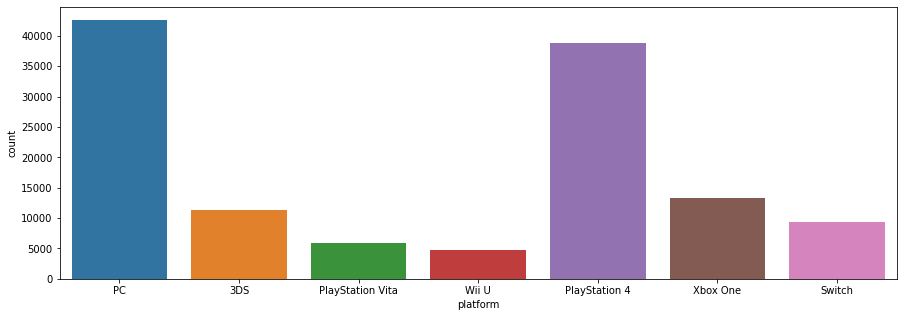

In [190]:
# plot platform for each review
plt.figure(figsize=(15,5))
sns.countplot("platform", data=review_df)
plt.show()

In [191]:
review_df = pd.read_csv("metacritic_critic_reviews.csv").tail(10000)
review_df=review_df[~review_df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [192]:
Y = review_df.score
X = review_df.review
test_size = 0.20
random_state = 200

# Creating and training data
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

In [193]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 21.79%


In [201]:
mohreview = "Instead of being fun it was boring lacking cool features"

In [202]:
print("Predict score for review:['0-100'] =>", model.predict([review_df.iloc[8000].review]))

Predict score for review:['0-100'] => [40.]


In [203]:
print("Predict score for review:['0-100'] =>", model.predict([mohreview]))

Predict score for review:['0-100'] => [60.]


In [197]:
review_df.iloc[8000]

name                                           Digital Chumps
review      Island Time VR is a survival game deprived of ...
game                                           Island Time VR
platform                                        PlayStation 4
score                                                      40
date                                             Apr  3, 2018
Name: 124043, dtype: object

In [198]:
review_df.iloc[8000].review

"Island Time VR is a survival game deprived of effective resources. Elements that should be in great supply—variability, actionable materials, and available real estate—are reduced to a minimum, instead depending on the novelty of virtual reality for sustenance. With PlayStation VR's incapacity for a proper room-scale experience, Island Time VR is left out to starve."

# Here comes the magic

This script can be run in Tableau, look at our Book-Exam.twb, it has everything needed to make things work.


* Goto the worksheet Python ML and Python Plot to see the magic
* remember to change the path to the CSV file
* If you want to change the input, look in the bottom left under parameters, and edit the parameter Input. We have already set up some example reviews to use, use others by changing the Current Value while editing.

## Since we have taken 10.000 items from our dataset, Tableau and Tabpy will stall for about 10 seconds minimum when changing Input!


In [199]:
# script used in tableau, takes the parameter Input and uses it in the script

# SCRIPT_REAL("
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn import feature_extraction, linear_model, model_selection, preprocessing
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.pipeline import Pipeline

# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.preprocessing import LabelEncoder

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# review_df = pd.read_csv('C:/Users/Andreas Heick Laptop/Documents/VisualStudio Projects/SOFT - 2 Semester/BI/BI-Exam/metacritic_critic_reviews.csv').tail(1000)
# review_df=review_df[~review_df.isin([np.nan, np.inf, -np.inf]).any(1)]

# Y = review_df.score
# X = review_df.review
# test_size = 0.20
# random_state = 200

# # Creating and training data
# x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

# pipe = Pipeline([('vect', CountVectorizer()),
#                  ('tfidf', TfidfTransformer()),
#                  ('model', DecisionTreeClassifier())])

# model = pipe.fit(x_train, y_train)

# prediction = model.predict(_arg1)

# return prediction.tolist()
# ", STR([Input]))

In [205]:
# SCRIPT_REAL("
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# review_df = pd.read_csv('C:/Users/Andreas Heick Laptop/Documents/VisualStudio Projects/SOFT - 2 Semester/BI/BI-Exam/metacritic_critic_reviews.csv').tail(1000)
# review_df=review_df[~review_df.isin([np.nan, np.inf, -np.inf]).any(1)]

# # plot platform for each review
# plt.figure(figsize=(15,5))
# sns.countplot('platform', data=review_df)
# return plt.show()
# ", STR([Input]))